In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pytesseract as tess

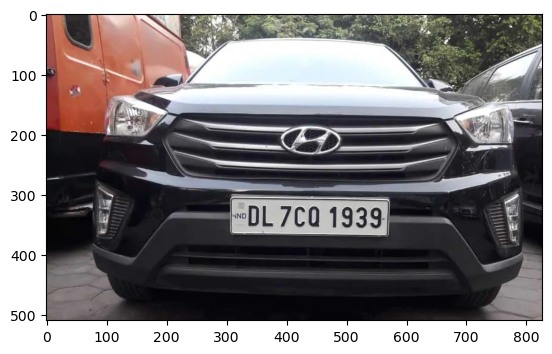

In [2]:
image = cv.imread('images/16.jpg')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

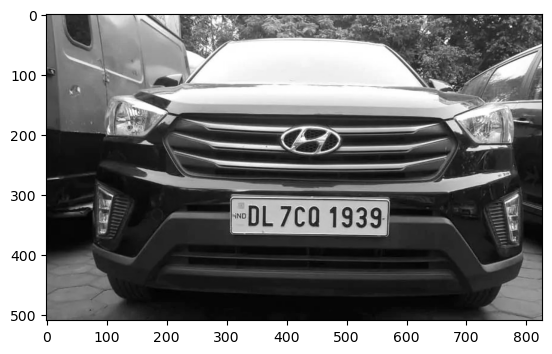

In [3]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 
plt.imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))

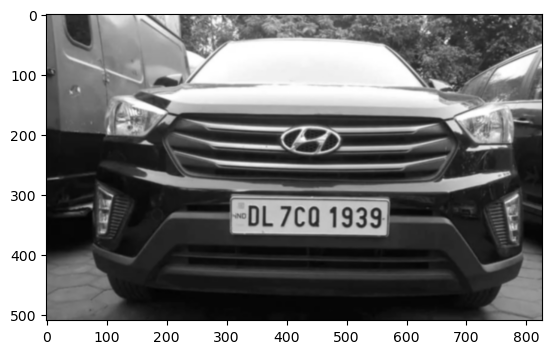

In [4]:
blur = cv.GaussianBlur(gray, (5,5), 0)
plt.imshow(cv.cvtColor(blur, cv.COLOR_BGR2RGB))

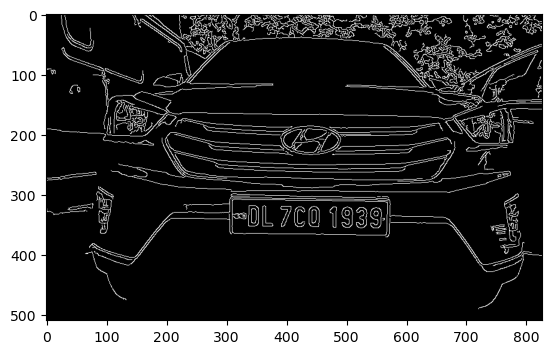

In [5]:
edged = cv.Canny(blur, 10, 200) 
plt.imshow(cv.cvtColor(edged, cv.COLOR_BGR2RGB))

In [6]:
contours, _ = cv.findContours(edged, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv.contourArea, reverse = True)[:5]
n_plate_cnt = None
for c in contours:
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        n_plate_cnt = approx
        break

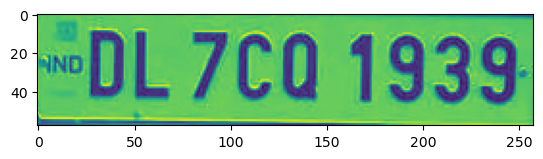

In [7]:
if  n_plate_cnt is None:
    detected = 0
    print ("No contour detected")
(x, y, w, h) = cv.boundingRect(n_plate_cnt)
license_plate = gray[y:y + h, x:x + w]
plt.imshow(license_plate)

In [8]:
tess.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = tess.image_to_string(license_plate)

In [9]:
text

'“DL 7CQ 1939\n'